# K Means Clustering

To perform K-Means clustering on this dataset, I will follow these steps:

Data Preprocessing: Check for missing values and standardize the data.
Choosing the Number of Clusters (k): Use the Elbow method to determine the optimal number of clusters.
K-Means Clustering: Apply K-Means clustering algorithm.
Analysis of Clusters: Analyze the resulting clusters to understand their characteristics.
Visualization: Visualize the clusters for better understanding.

In [7]:
import pandas as pd

# Loading the dataset from the uploaded file
file_path = '/Users/aviajmera/Downloads/Clustering/K_Means/wine-clustering.csv'
wine_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
wine_data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
from sklearn.preprocessing import StandardScaler

# Checking for missing values
missing_values = wine_data.isnull().sum()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)

# Displaying the missing values information and the first few rows of scaled data
missing_values, scaled_data[:5]


(Alcohol                 0
 Malic_Acid              0
 Ash                     0
 Ash_Alcanity            0
 Magnesium               0
 Total_Phenols           0
 Flavanoids              0
 Nonflavanoid_Phenols    0
 Proanthocyanins         0
 Color_Intensity         0
 Hue                     0
 OD280                   0
 Proline                 0
 dtype: int64,
 array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
          0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
          0.36217728,  1.84791957,  1.01300893],
        [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
          0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
          0.40605066,  1.1134493 ,  0.96524152],
        [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
          0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
          0.31830389,  0.78858745,  1.39514818],
        [ 1.69154964, -0.34681064,  0.48792

/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

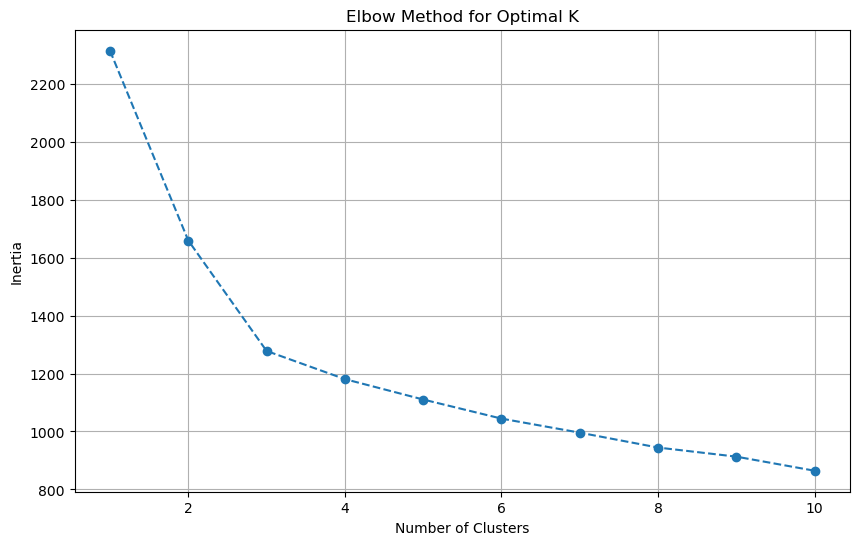

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow method
inertia = []
range_values = range(1, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The Elbow plot shows the sum of squared distances of samples to their nearest cluster center for different numbers of clusters (K). As we can see, the inertia decreases as the number of clusters increases. However, the rate of decrease slows down significantly after a certain point, forming an "elbow".

In this plot, the elbow seems to be around K=3 or K=4. This suggests that either 3 or 4 clusters might be optimal for our dataset. The exact choice can depend on additional domain knowledge or specific requirements of the analysis.

In [9]:
# Applying K-means clustering with K=3
kmeans_3 = KMeans(n_clusters=3, random_state=0)
clusters_3 = kmeans_3.fit_predict(scaled_data)

# Adding the cluster information to the original dataframe
wine_data_clustered_3 = wine_data.copy()
wine_data_clustered_3['Cluster'] = clusters_3

# Displaying the first few rows with cluster labels
wine_data_clustered_3.head()


/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


The K-means clustering with K=3 has been successfully applied to the wine dataset. Each wine sample has been assigned to one of three clusters, labeled as 0, 1, or 2 in the 'Cluster' column of the dataframe.

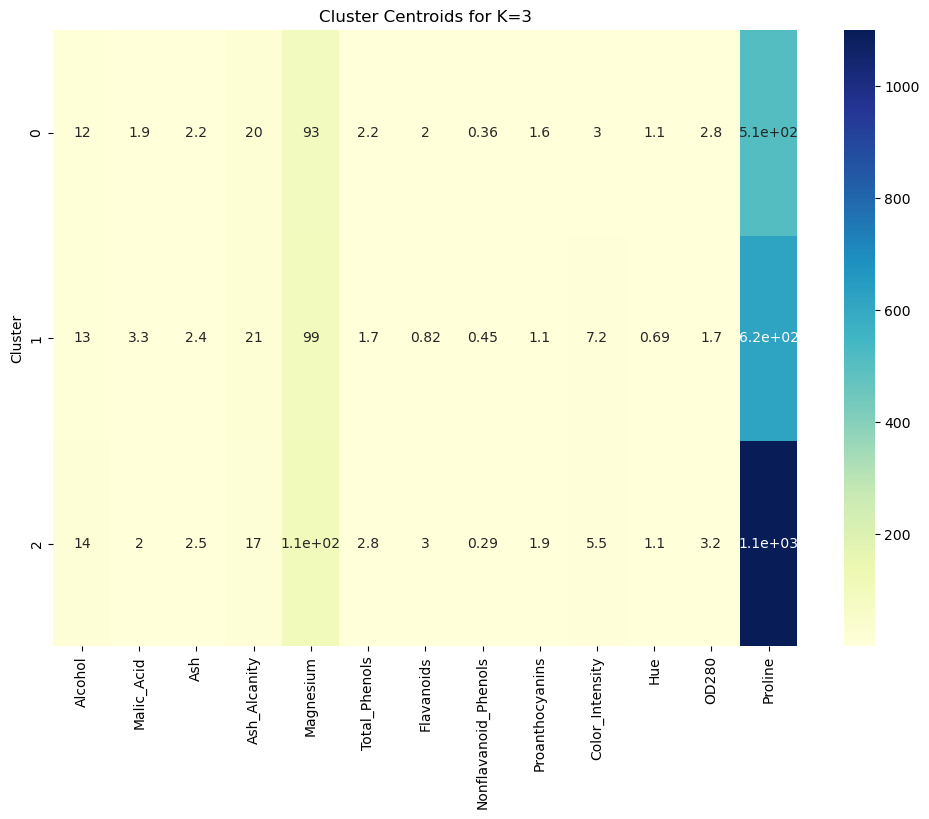

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


In [11]:
import seaborn as sns

# Calculating the mean of each feature for each cluster
cluster_centroids_3 = wine_data_clustered_3.groupby('Cluster').mean()

# Visualizing the cluster centroids
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centroids_3, cmap="YlGnBu", annot=True)
plt.title("Cluster Centroids for K=3")
plt.show()

cluster_centroids_3


The heatmap above displays the mean values of each feature for the three clusters (labeled 0, 1, and 2). These cluster centroids help us understand the characteristics of each cluster:

Cluster 0: Characterized by higher levels of Malic Acid, Ash Alcanity, and Color Intensity, but lower levels of Flavanoids, Total Phenols, and Proline.
Cluster 1: This cluster has moderate levels of Alcohol, Malic Acid, and Ash Alcanity. It's notable for higher Total Phenols and Flavanoids compared to Cluster 0, but lower than Cluster 2.
Cluster 2: Features wines with higher Alcohol, Magnesium, Total Phenols, Flavanoids, Proanthocyanins, and Proline. This cluster generally represents wines with more intense characteristics in these chemical properties.

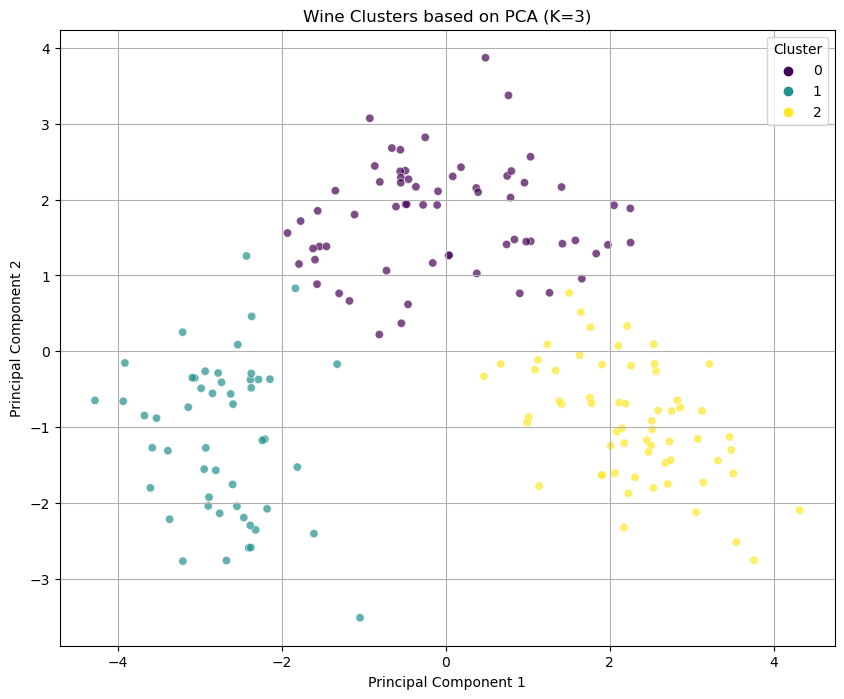

In [12]:
from sklearn.decomposition import PCA

# Performing PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters_3

# Plotting the clusters based on the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Wine Clusters based on PCA (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


The scatter plot above visualizes the wine clusters based on the first two principal components obtained from PCA (Principal Component Analysis). Each point represents a wine sample, and the colors indicate the cluster to which each sample belongs:

The clusters are relatively distinct, indicating good separation between them in the reduced dimensional space.
Principal Component 1 (PC1) and Principal Component 2 (PC2) represent new axes that capture the most variance in the data.
This visualization helps us understand how the samples are grouped in a lower-dimensional space, which is particularly useful given the high-dimensional nature of the original dataset.